# Medical Appointment No Shows Prediction


**Table of contents**<a id='toc0_'></a>

- 1. [Data Preparation](#toc1_)
  - 1.1. [Data Collection and Ingestion](#toc1_1_)
  - 1.2. [Data Cleaning](#toc1_2_)
- 2. [Exploratory Data Analysis (EDA) and Visualization](#toc2_)
  - 2.1. [Univariate Analysis](#toc2_1_)
  - 2.2. [Bivariate/Multivariate Analysis](#toc2_2_)
    - 2.2.1. [Numerical values](#toc2_2_1_)
    - 2.2.2. [Binary values](#toc2_2_2_)
    - 2.2.3. [Categorical columns](#toc2_2_3_)
- 3. [Feature Engineering](#toc3_)
  - 3.1. [Encoding Categorical Variables](#toc3_1_)
  - 3.2. [Transformations for Numeric Features](#toc3_2_)
- 4. [Data Preparation For Modeling](#toc4_)
- 5. [Modeling Approaches](#toc5_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)

from xgboost import XGBClassifier

## 1. <a id='toc1_'></a>[Data Preparation](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Data Collection and Ingestion](#toc0_)


In [74]:
dataset = pd.read_csv("./data/heart.csv")

In [75]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [77]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.2. <a id='toc1_2_'></a>[Data Cleaning](#toc0_)


In [94]:
print(len(dataset))
dataset.drop_duplicates(inplace=True)
print(len(dataset))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 2. <a id='toc2_'></a>[Exploratory Data Analysis (EDA) and Visualization](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Univariate Analysis](#toc0_)


In [79]:
numerical_columns = dataset[["age", "trestbps", "chol", "thalach", "oldpeak"]].copy()
binary_columns = dataset[["sex", "fbs", "exang", "target"]].copy()
categorical_columns = dataset[["cp", "restecg", "slope", "ca", "thal"]].copy()

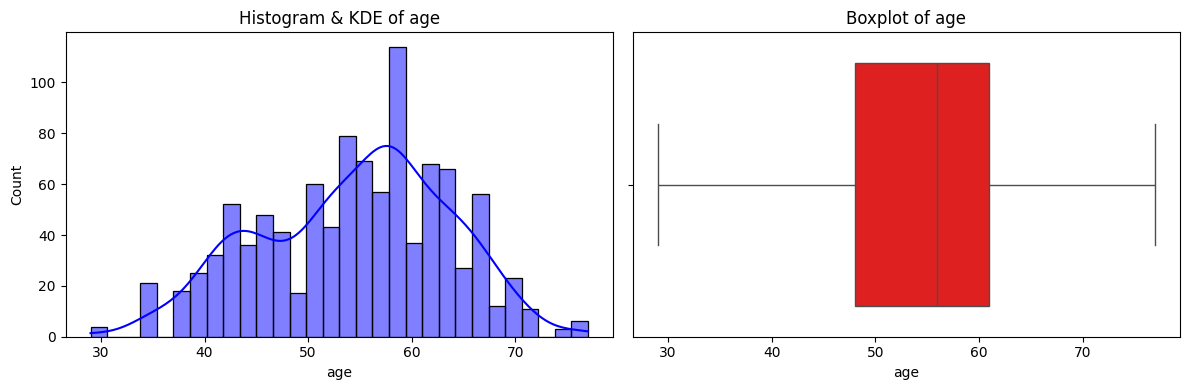

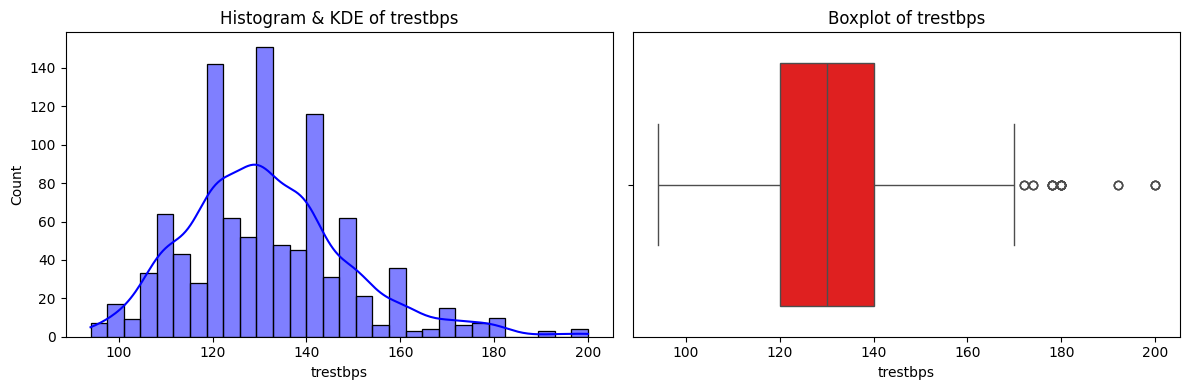

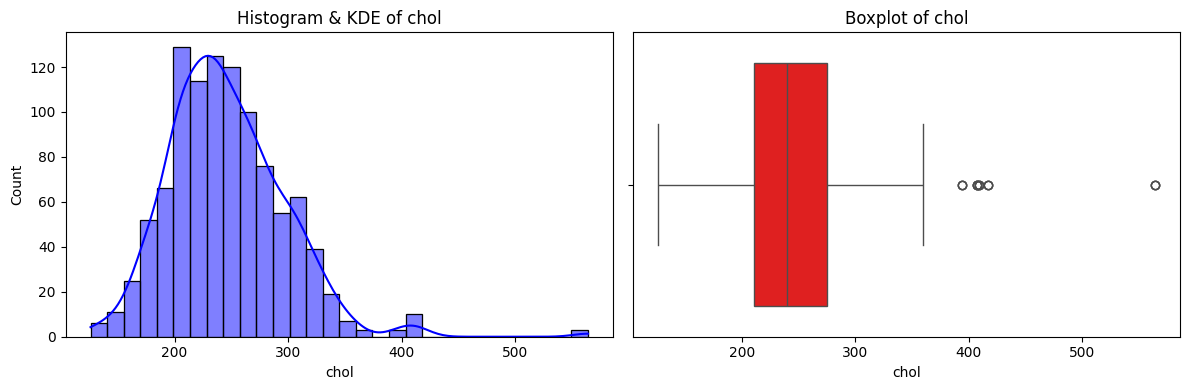

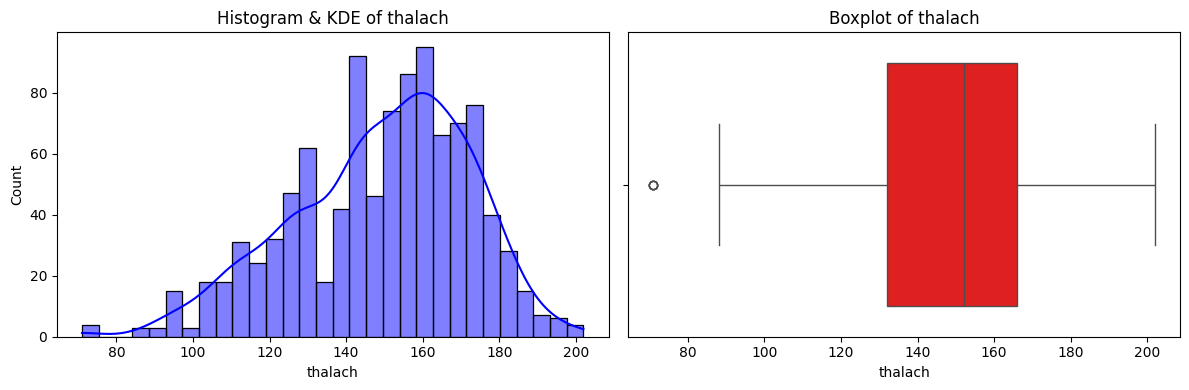

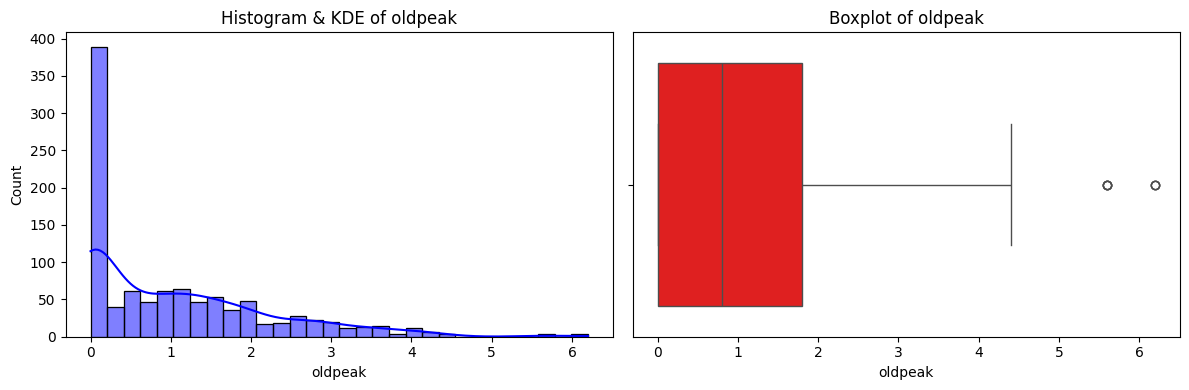

In [80]:
numerical_summary = numerical_columns.describe().T
numerical_summary["skewness"] = numerical_columns.skew()
numerical_summary["kurtosis"] = numerical_columns.kurtosis()

for col in numerical_columns.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(numerical_columns[col], kde=True, bins=30, ax=axes[0], color="blue")
    axes[0].set_title(f"Histogram & KDE of {col}")

    sns.boxplot(x=numerical_columns[col], ax=axes[1], color="red")
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

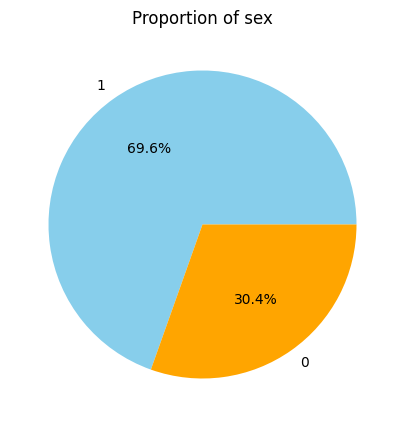

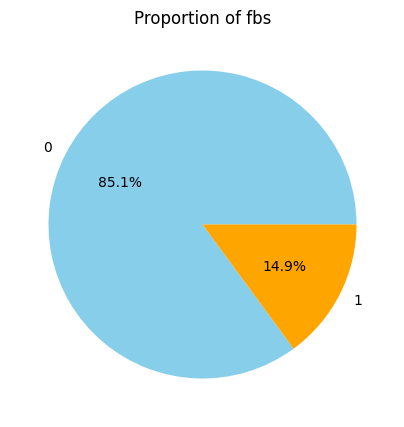

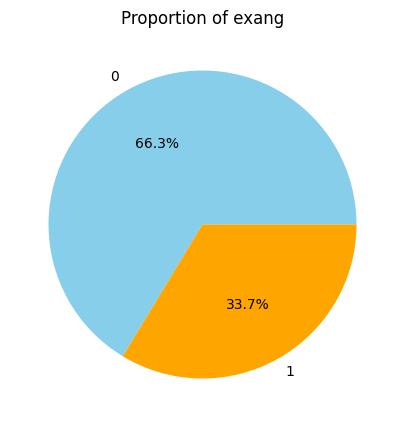

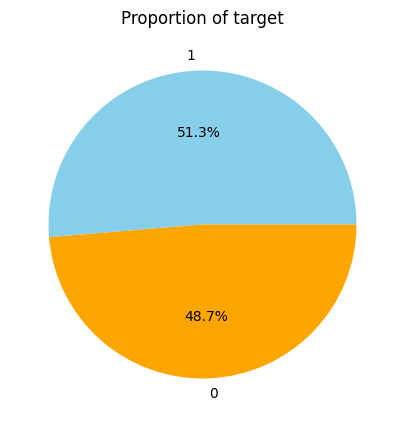

In [81]:
for col in binary_columns.columns:
    plt.figure(figsize=(5, 5))
    binary_columns[col].value_counts().plot.pie(
        autopct="%1.1f%%", colors=["skyblue", "orange"]
    )
    plt.title(f"Proportion of {col}")
    plt.ylabel("")
    plt.show()

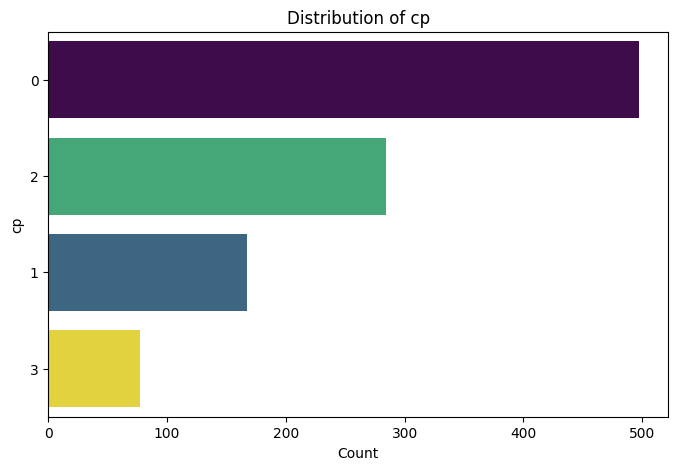

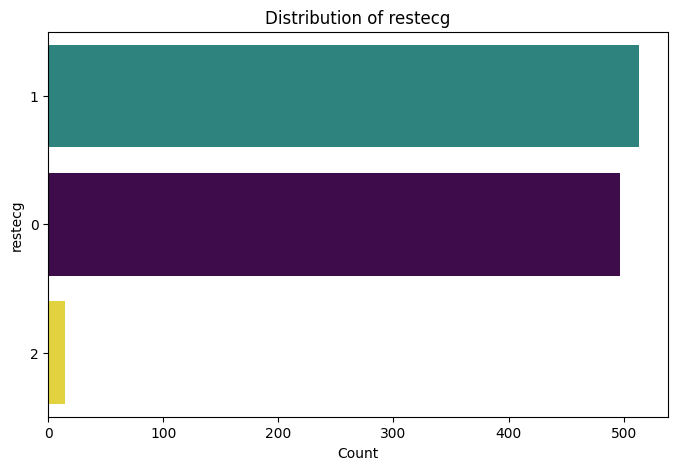

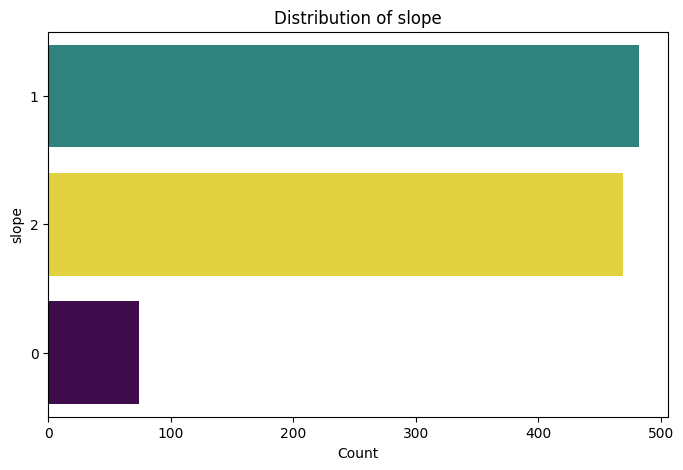

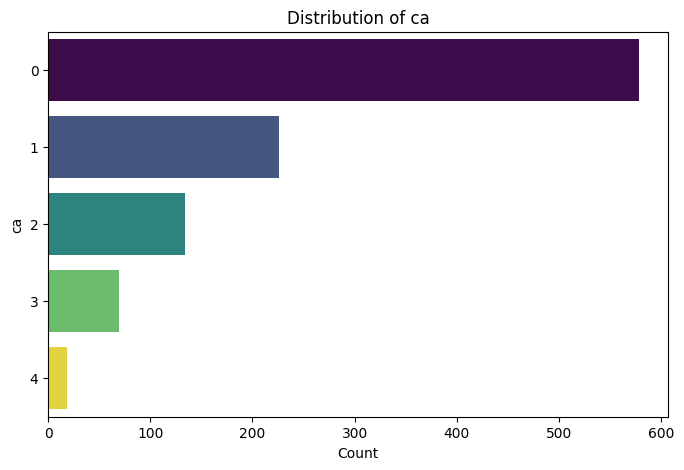

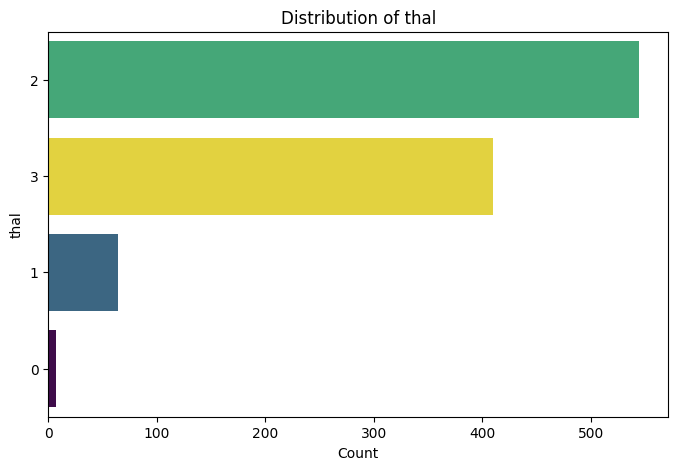

In [82]:
for col in categorical_columns.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        y=categorical_columns[col],
        hue=categorical_columns[col],
        legend=False,
        order=categorical_columns[col].value_counts().index,
        palette="viridis",
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

### 2.2. <a id='toc2_2_'></a>[Bivariate/Multivariate Analysis](#toc0_)


#### 2.2.1. <a id='toc2_2_1_'></a>[Numerical values](#toc0_)


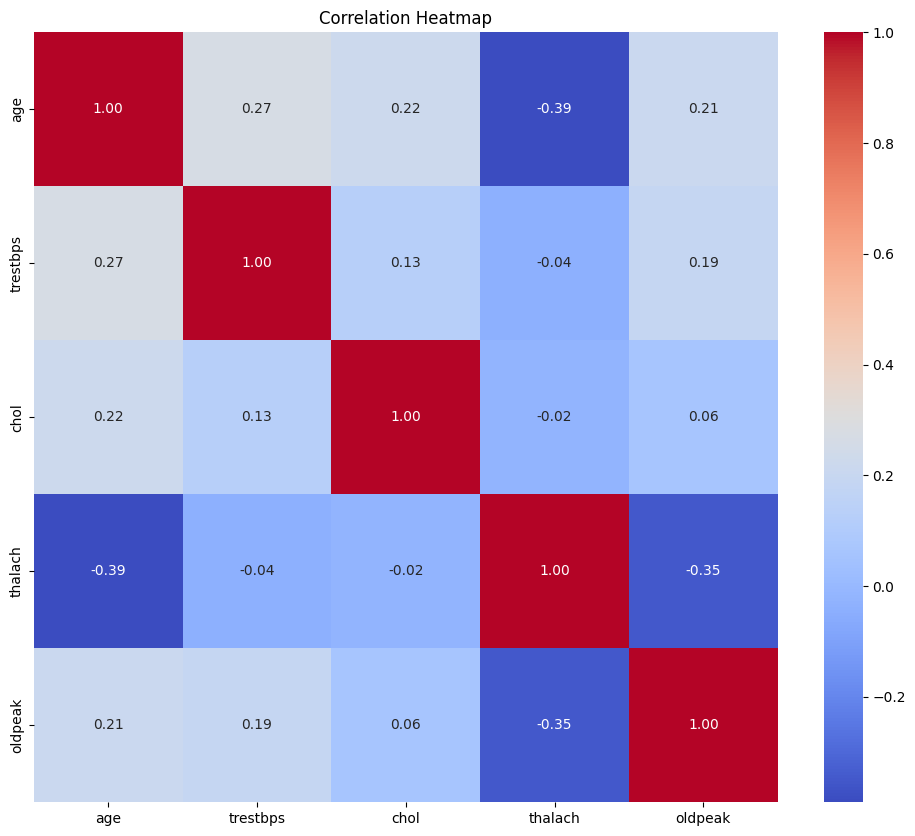

In [83]:
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_columns.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

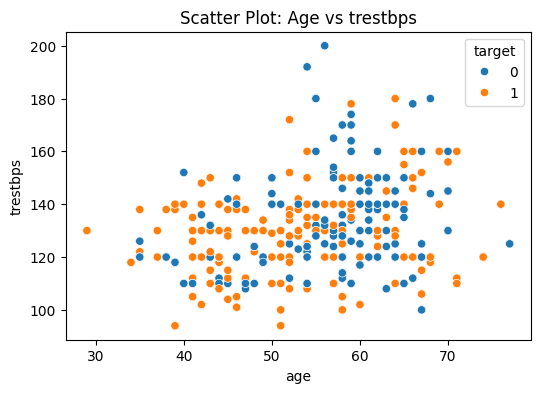

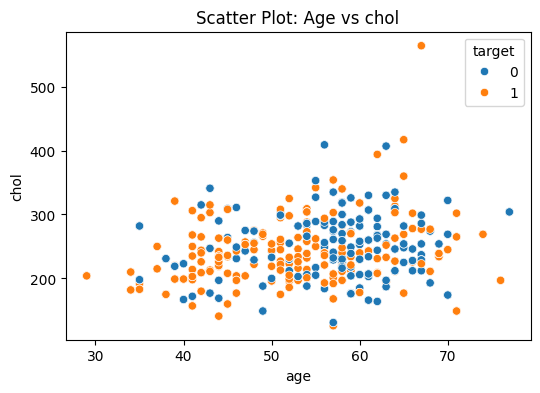

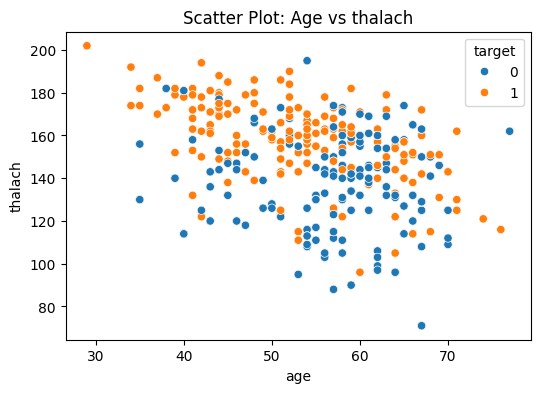

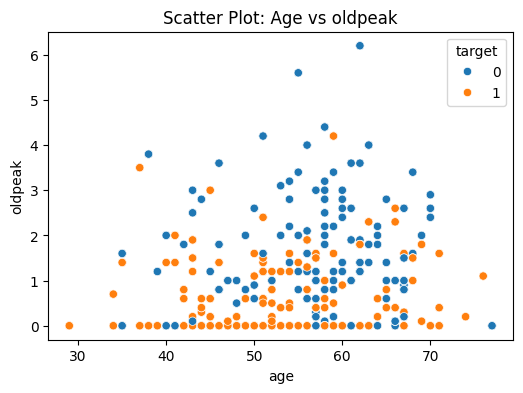

In [84]:
for col in numerical_columns.columns:
    if col != "age":
        plt.figure(figsize=(6, 4))
        sns.scatterplot(
            x=numerical_columns["age"],
            y=numerical_columns[col],
            hue=binary_columns["target"],
        )
        plt.title(f"Scatter Plot: Age vs {col}")
        plt.show()

#### 2.2.2. <a id='toc2_2_2_'></a>[Binary values](#toc0_)


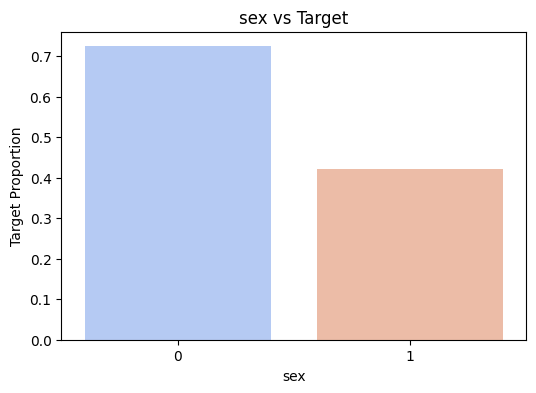

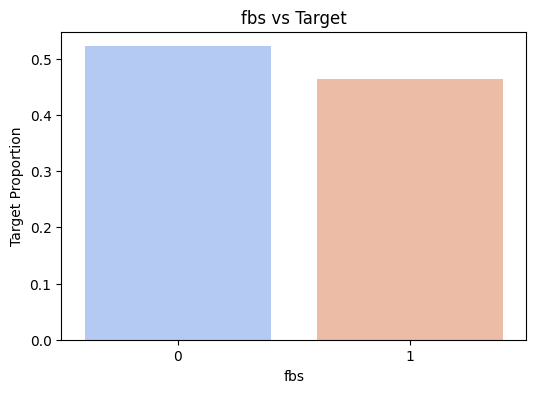

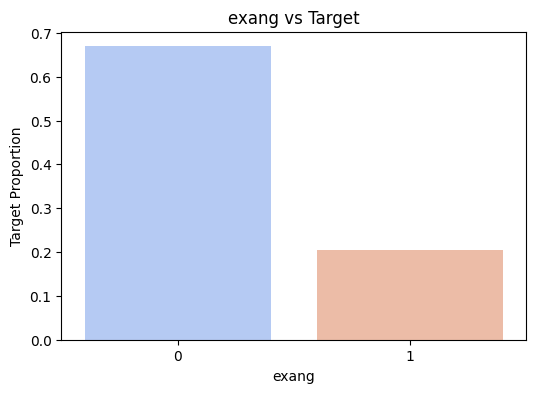

In [85]:
for col in binary_columns.columns:
    if col == "target":
        continue

    plt.figure(figsize=(6, 4))
    sns.barplot(
        x=binary_columns[col],
        hue=binary_columns[col],
        legend=False,
        y=binary_columns["target"],
        errorbar=None,
        palette="coolwarm",
    )
    plt.title(f"{col} vs Target")
    plt.xlabel(col)
    plt.ylabel("Target Proportion")
    plt.show()

#### 2.2.3. <a id='toc2_2_3_'></a>[Categorical columns](#toc0_)


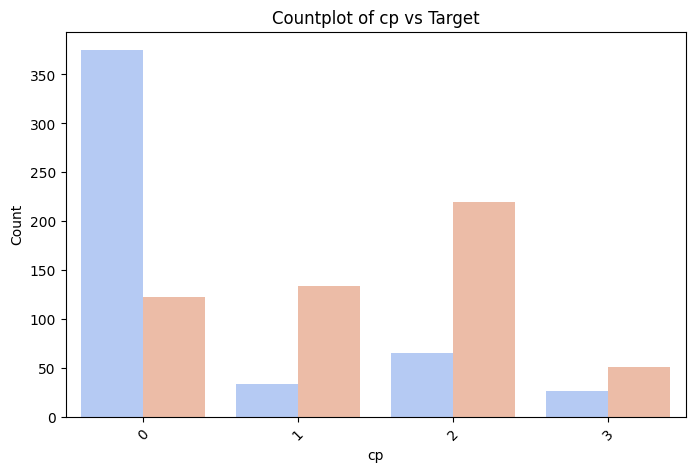

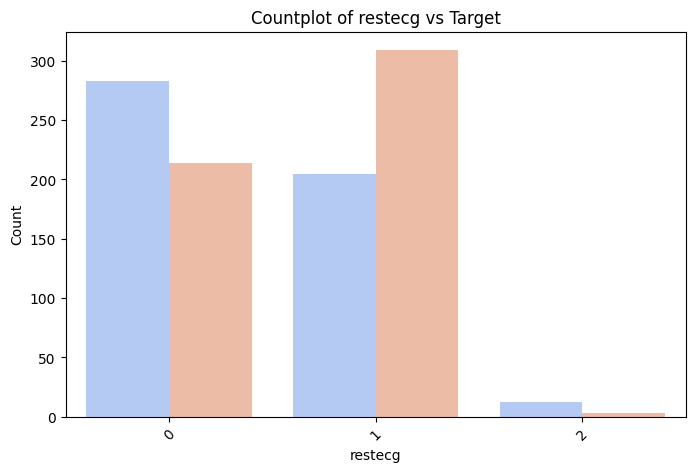

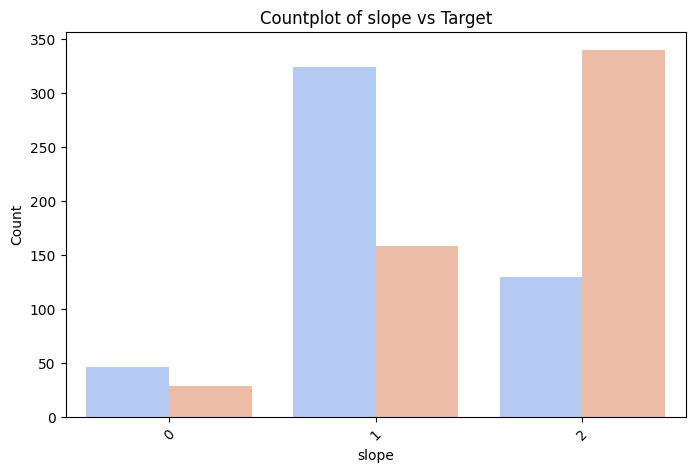

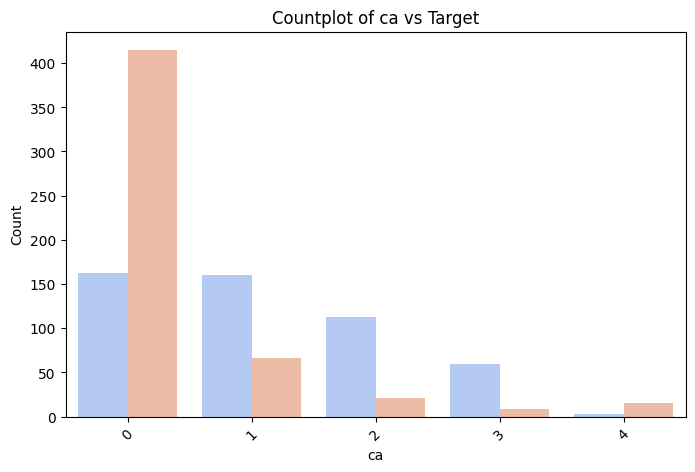

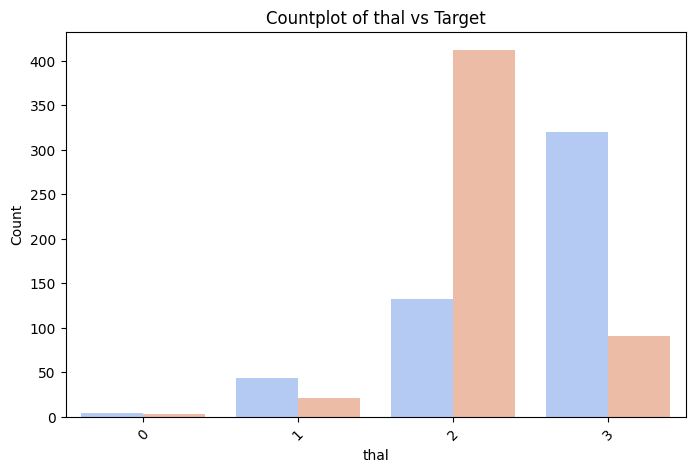

In [86]:
for col in categorical_columns.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        x=categorical_columns[col],
        hue=binary_columns["target"],
        palette="coolwarm",
        legend=False,
    )
    plt.title(f"Countplot of {col} vs Target")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

## 3. <a id='toc3_'></a>[Feature Engineering](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Encoding Categorical Variables](#toc0_)


### 3.2. <a id='toc3_2_'></a>[Transformations for Numeric Features](#toc0_)


## 4. <a id='toc4_'></a>[Data Preparation For Modeling](#toc0_)


In [87]:
X = dataset.drop(columns=["target"])
y = dataset["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## 5. <a id='toc5_'></a>[Modeling Approaches](#toc0_)


In [88]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=10000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLPClassifier": MLPClassifier(random_state=42),
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred),
        "PredictedValues": y_pred,
    }

In [89]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

results["XGBoost"] = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1-Score": f1_score(y_test, y_pred_xgb),
    "ROC-AUC": roc_auc_score(y_test, y_pred_xgb),
    "PredictedValues": y_pred_xgb,
}

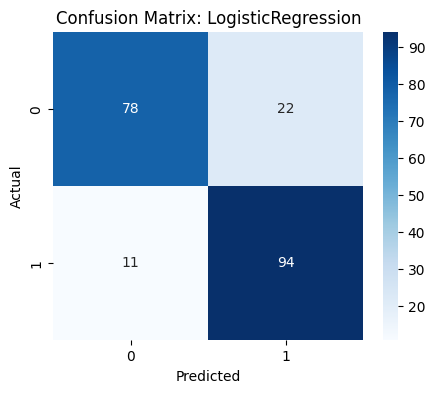

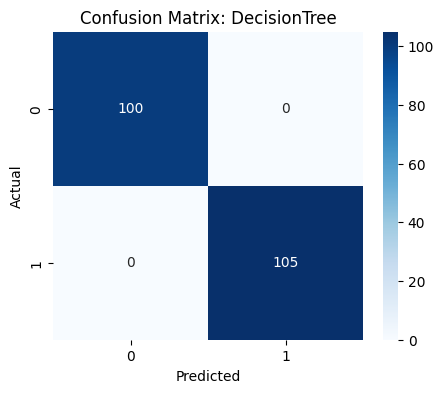

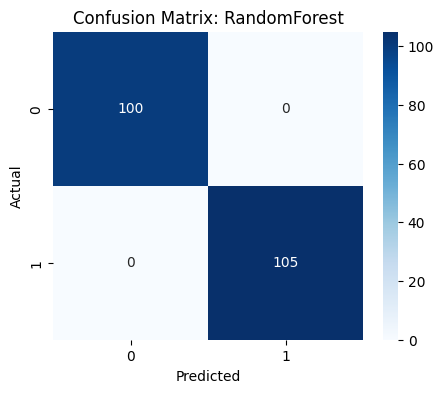

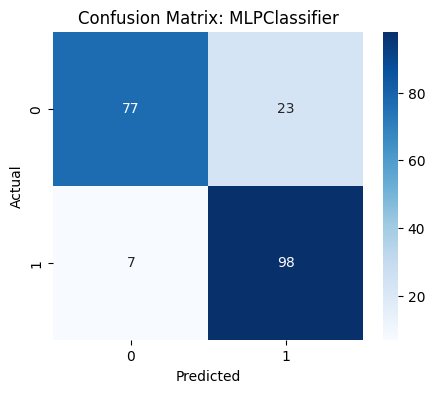

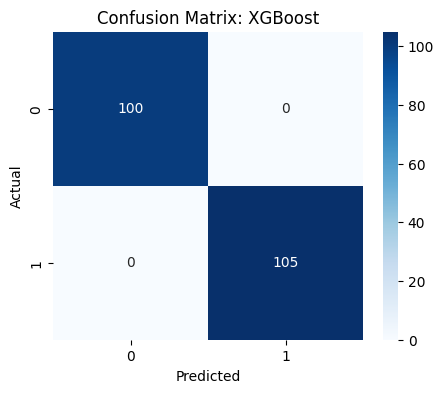

In [90]:
def plot_confusion_matrix(y_true, y_pred, model_name):

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


for model_name, model_results in results.items():
    plot_confusion_matrix(
        y_true=y_test, y_pred=model_results["PredictedValues"], model_name=model_name
    )

In [91]:
metrics_df = pd.DataFrame(results).T
metrics_df = metrics_df.drop(columns=["PredictedValues"])
metrics_df = metrics_df.round(4)

In [92]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
palettes = ["viridis", "magma", "cividis", "coolwarm", "plasma"]

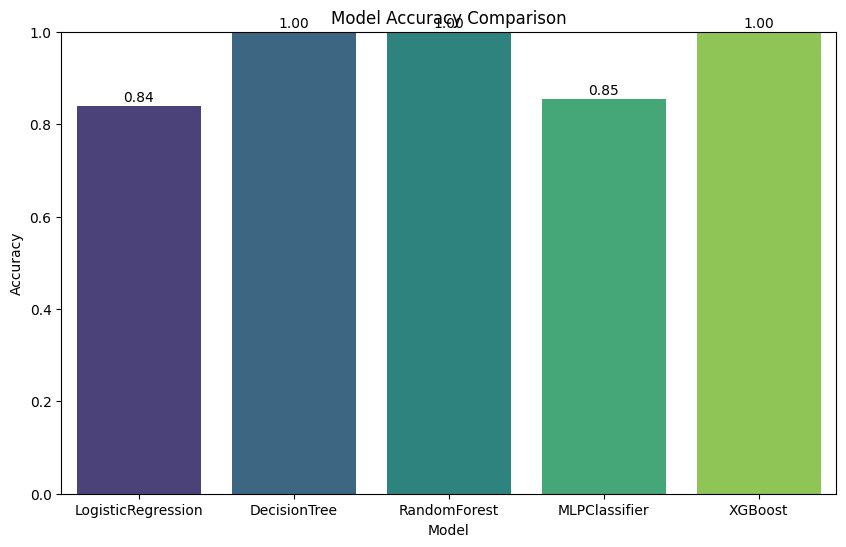

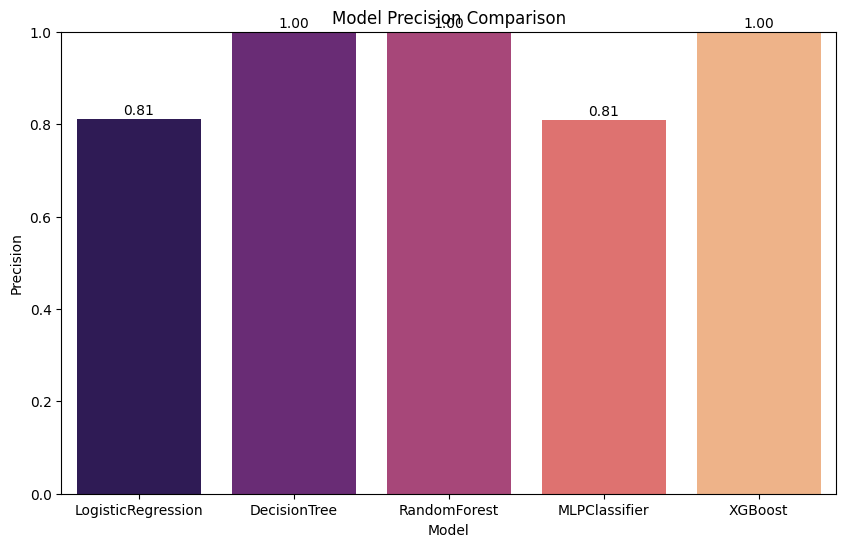

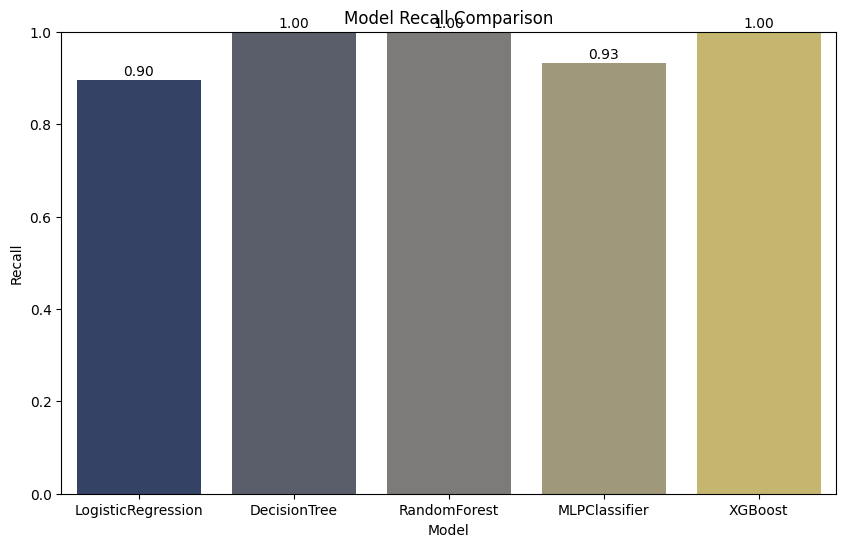

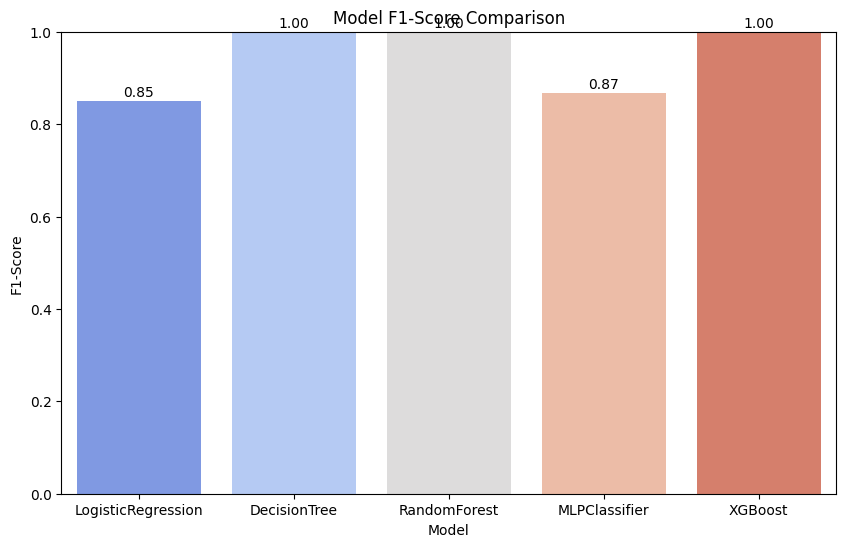

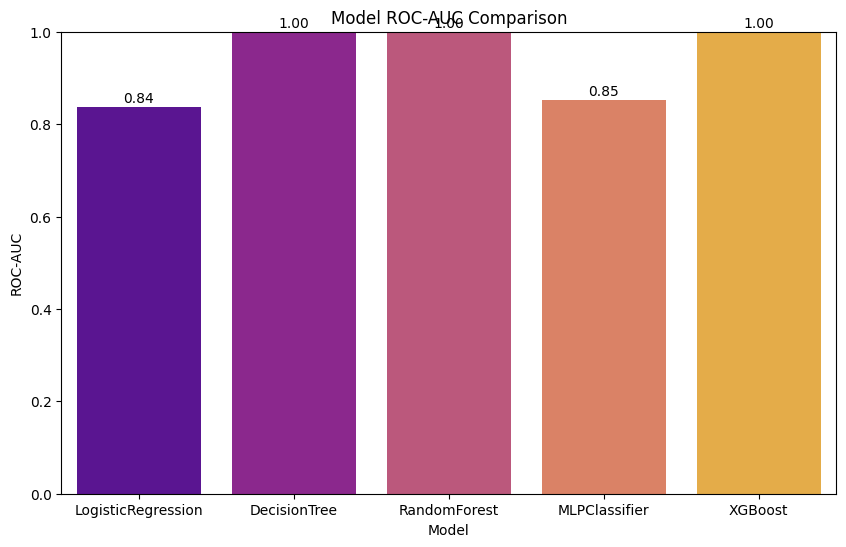

In [93]:
for metric, palette in zip(metrics, palettes):
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=metrics_df.index,
        hue=metrics_df.index,
        legend=False,
        y=metric,
        data=metrics_df,
        palette=palette,
    )
    plt.title(f"Model {metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.ylim(0, 1)
    for index, value in enumerate(metrics_df[metric]):
        plt.text(index, value + 0.01, f"{value:.2f}", ha="center")
    plt.show()